In [1]:
from random import random, sample

In [2]:
import gensim
from node2vec import Node2Vec

C:\dev\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import keras
import tensorflow as tf
import numpy as np

C:\dev\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
f = open('data/string_nonzero_experiments.csv')
num_links=0
for line in f:
    num_links+=1
print(num_links)

f = open('data/string_nonzero_experiments.csv')
proteins = set()
pairs = set()
uniq_pair_file = open('data/unique_string_nonzero_experiments.csv','w')
uniq_protein_file = open('data/unique_experiment_protein_ids.csv','w')

next(f)
for line in f:
    source, target, score = line.strip().split(',')
    
    if source not in proteins:
        uniq_protein_file.write(source + '\n')
    proteins.add(source)
    
    if target not in proteins:
        uniq_protein_file.write(target + '\n')
    proteins.add(target)
    
    if (source,target) not in pairs:
        uniq_pair_file.write(line)
    pairs.add((source,target))

print(len(proteins))
print(len(pairs))
uniq_pair_file.close()
uniq_protein_file.close()

f = open('data/string_nonzero_experiments.csv')
train_neg_file = open('data/protein_pairs/full_neg.dat','w')

header = next(f)
train_neg_file.write(header)

for line in f:
    negative = tuple(sample(proteins, 2))
    while negative in pairs:
        negative = tuple(sample(proteins, 2))
    train_neg_file.write(','.join(negative) + ',0\n')

train_neg_file.close()
f.close()

357945
14795
349276


In [5]:
class Sequences:
    def __init__(self, filename):
        self.filename = filename
        self.f = open(self.filename)
    
    # this function is called each epoch of gensim training
    def __iter__(self):
        self.f = open(self.filename)
        return self
    
    def __next__(self):
        line = next(self.f)
        id,sequence = line.strip().split(',')
        sequence = sequence.split(' ')
        return gensim.models.doc2vec.TaggedDocument(tags=[id], words=sequence)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [7]:
from sklearn.metrics import classification_report, precision_recall_curve, precision_score, recall_score, accuracy_score, f1_score

In [8]:
from sklearn.utils.fixes import signature
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score

In [9]:
d2v_epochs = 21
d2v_vector_size = 99
d2v_window = 8
d2v_min_count = 9
n2v_dimensions = 104
n2v_window = 6
n2v_epochs = 30
n2v_num_walks = 32
n2v_walk_length = 27
n2v_p = 4
n2v_q = 2
nn_dropout = 0.22818154872598262

In [11]:
training_edgelist_file = 'data/protein_pairs/full.dat'

print('Training Node2Vec'.center(80,'-'))
n2v = Node2Vec()
model = n2v.fit_transform(training_edgelist_file,
                          dimensions=n2v_dimensions, 
                          window=n2v_window,
                          epochs=n2v_epochs,
                          num_walks=n2v_num_walks, 
                          walk_length=n2v_walk_length, 
                          p=n2v_p, 
                          q=n2v_q,
                         )

n2v.model.save('models/node2vec.model')

# vectorfilename = 'data/vectors/node2vec_sample{}_p{}_q{}.dat'.format(sr_str, p, q)
# vector_file = open(vectorfilename, 'w')
# for i,n in enumerate(n2v.G.nodes):
#     vector_file.write(n + ',' + ','.join([str(_) for _ in model.wv.vectors[i,:]]) + '\n')
# vector_file.close()

print('Node2Vec similarity to BRCA1'.center(80,'-'))
for v in n2v.model.wv.most_similar('P38398|BRCA1_HUMAN'):
    print(v)

#### doc2vec

filename = 'data/split_human_uniprot_sequences.dat'
sequences = Sequences(filename)
print('Training doc2vec'.center(80,'-'))

doc2vec = gensim.models.Doc2Vec(
    documents=sequences,
    epochs=d2v_epochs,
    dm=1,
    vector_size=d2v_vector_size,
    window=d2v_window,
    min_count=d2v_min_count
)

doc2vec.save('models/doc2vec.model')

print('Doc2Vec similarity to BRCA1'.center(80,'-'))
for v in doc2vec.docvecs.most_similar(positive=['P38398|BRCA1_HUMAN']):
    print(v)

unmatched_doc2vec_node2vec_proteins_file = open('data/unmatched_doc2vec_node2vec_proteins_file.csv','w')
i=0
vectors = dict()
for protein in n2v.model.wv.index2word:
#     print(protein)
    try:
        v = np.append(
            doc2vec[protein],
            n2v.model.wv[protein]
        )
        vectors[protein] = v
        i+=1
    except:
        unmatched_doc2vec_node2vec_proteins_file.write(protein + '\n')

unmatched_doc2vec_node2vec_proteins_file.close()
#     print(i)

-------------------------------Training Node2Vec--------------------------------
Walk iteration: 
1 / 32
num walks 14795
2 / 32
num walks 29590
3 / 32
num walks 44385
4 / 32
num walks 59180
5 / 32
num walks 73975
6 / 32
num walks 88770
7 / 32
num walks 103565
8 / 32
num walks 118360
9 / 32
num walks 133155
10 / 32
num walks 147950
11 / 32
num walks 162745
12 / 32
num walks 177540
13 / 32
num walks 192335
14 / 32
num walks 207130
15 / 32
num walks 221925
16 / 32
num walks 236720
17 / 32
num walks 251515
18 / 32
num walks 266310
19 / 32
num walks 281105
20 / 32
num walks 295900
21 / 32
num walks 310695
22 / 32
num walks 325490
23 / 32
num walks 340285
24 / 32
num walks 355080
25 / 32
num walks 369875
26 / 32
num walks 384670
27 / 32
num walks 399465
28 / 32
num walks 414260
29 / 32
num walks 429055
30 / 32
num walks 443850
31 / 32
num walks 458645
32 / 32
num walks 473440
--------------------------Node2Vec similarity to BRCA1--------------------------
('Q93097|WNT2B_HUMAN', 0.80827474594

C:\dev\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


--------------------------Doc2Vec similarity to BRCA1---------------------------
('Q9HCI6|K1586_HUMAN', 0.6639567613601685)
('Q9BR77|CCD77_HUMAN', 0.6278455853462219)
('Q8NA77|TEX19_HUMAN', 0.6268928050994873)
('Q5JX71|F209A_HUMAN', 0.6074294447898865)
('Q99750|MDFI_HUMAN', 0.6054055690765381)
('Q8IUH3|RBM45_HUMAN', 0.6045866012573242)
('Q86WC4|OSTM1_HUMAN', 0.6022646427154541)
('Q69YH5|CDCA2_HUMAN', 0.5974646806716919)
('Q5JR59|MTUS2_HUMAN', 0.5950332283973694)
('Q9HBT8|Z286A_HUMAN', 0.5873355865478516)
------------------Generating Training and validation datasets-------------------


NameError: name 'sr_str' is not defined

In [12]:
print('Generating Training and validation datasets'.center(80,'-'))

train_file = open('data/protein_pairs/full.dat')
header = next(train_file)
x_train = []
y_train = []

for line in train_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_train.append(np.append(vs,vt))
        y_train.append(np.array([1]))

train_neg_file = open('data/protein_pairs/full_neg.dat')
header = next(train_neg_file)

for line in train_neg_file:
    source, target, score = line.strip().split(',')
    if source in vectors and target in vectors:
        vs = vectors[source]
        vt = vectors[target]
        x_train.append(np.append(vs,vt))
        y_train.append(np.array([0]))

x_train = np.array(x_train)
y_train = np.array(y_train)

print('Training data shape')
print('x',x_train.shape)
print('y',y_train.shape)

------------------Generating Training and validation datasets-------------------
Training data shape
x (685527, 406)
y (685527, 1)


In [13]:
print('Training Neural Network'.center(80,'-'))

model = Sequential()

input_size = (d2v_vector_size + n2v_dimensions)*2

model.add(Dense(units=256, activation='relu', input_dim=input_size))
model.add(Dropout(nn_dropout))
model.add(Dense(units=128, activation='relu', input_dim=256))
model.add(Dropout(nn_dropout))
model.add(Dense(units=64, activation='relu', input_dim=128))
model.add(Dropout(nn_dropout))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['binary_accuracy'])

# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_train, y_train, epochs=10, batch_size=32)

----------------------------Training Neural Network-----------------------------
Epoch 1/10
685527/685527 [==============================] - 96s 140us/step - loss: 0.3300 - binary_accuracy: 0.8567
Epoch 2/10
685527/685527 [==============================] - 95s 139us/step - loss: 0.2025 - binary_accuracy: 0.9228
Epoch 3/10
685527/685527 [==============================] - 96s 141us/step - loss: 0.1776 - binary_accuracy: 0.9352
Epoch 4/10
685527/685527 [==============================] - 95s 138us/step - loss: 0.1665 - binary_accuracy: 0.9409
Epoch 5/10
685527/685527 [==============================] - 95s 138us/step - loss: 0.1612 - binary_accuracy: 0.9446
Epoch 6/10
685527/685527 [==============================] - 94s 137us/step - loss: 0.1594 - binary_accuracy: 0.94802s - loss:
Epoch 7/10
685527/685527 [==============================] - 94s 137us/step - loss: 0.1646 - binary_accuracy: 0.9510
Epoch 8/10
685527/685527 [==============================] - 92s 134us/step - loss: 0.1657 - binar

### Finding New Interactions

##### Non symmetric nature of predictions

In [18]:
v = np.concatenate([
    vectors['P50553|ASCL1_HUMAN'],
    vectors['P41134|ID1_HUMAN']
])

v = np.array([v])
print("Mash to ID1")
print(model.predict_proba(x=v, batch_size=1)[0][0])

v = np.concatenate([
    vectors['P41134|ID1_HUMAN'],
    vectors['P50553|ASCL1_HUMAN']
])

v = np.array([v])
print("ID1 to Mash")
print(model.predict_proba(x=v, batch_size=1)[0][0])

Mash to ID1
0.9312986
ID1 to Mash
0.5803551


In [20]:
def find_new_interactions(target_protein, threshold=.9):
    probs = []

    for protein,vector in vectors.items():
        x = np.concatenate([
            vector, vectors[target_protein]
        ])
        x = np.array([x])
        y_prob = model.predict_proba(x, batch_size=1)[0][0]
        probs.append((protein, y_prob))

    predicted_interactors = set([protein for protein,prob in probs if prob > threshold])

    # sorted(high_probs, key=lambda protein_prob: protein_prob[1], reverse=True)
    # for protein, prob in filter(probs[:10]:
    #     print(protein, prob[0][0])

    with open('data/protein_pairs/full.csv') as f:
        known_interactors = set()

        header = next(f)

        for line in f:
            source, target, score = line.strip().split(',')
            if target == target_protein or source == target_protein:
                known_interactors.add(source)

    new_interactors = predicted_interactors - known_interactors
    return new_interactors

In [21]:
# return set(sorted(new_interactors, key = lambda _: _.split('|')[1]))

In [22]:
new_bmp2_interactors = find_new_interactions('P12643|BMP2_HUMAN', threshold=.95)
new_mash_interactors = find_new_interactions('P50553|ASCL1_HUMAN', threshold=.95)
new_id1_interactors = find_new_interactions('P41134|ID1_HUMAN', threshold=.95)
new_ngn_interactors = find_new_interactions('Q9H2A3|NGN2_HUMAN', threshold=.95)
new_hes1_interactors = find_new_interactions('Q14469|HES1_HUMAN', threshold=.95)

In [23]:
print('bmp2: {}'.format(len(new_bmp2_interactors)))
print('mash: {}'.format(len(new_mash_interactors)))
print('id1: {}'.format(len(new_id1_interactors)))
print('ngn: {}'.format(len(new_ngn_interactors)))
print('hes1: {}'.format(len(new_hes1_interactors)))

bmp2: 61
mash: 102
id1: 510
ngn: 113
hes1: 534


In [30]:
new_affects_all = (
    new_bmp2_interactors & 
    new_hes1_interactors & 
    new_id1_interactors & 
    new_mash_interactors &
    new_ngn_interactors
)

for protein in new_affects_all:
    print(protein)

O14746|TERT_HUMAN
P43121|MUC18_HUMAN
Q15797|SMAD1_HUMAN
P84022|SMAD3_HUMAN
Q13485|SMAD4_HUMAN
Q09666|AHNK_HUMAN
Q99973|TEP1_HUMAN
P21333|FLNA_HUMAN


In [25]:
affects_only_bmp2 = (
    new_bmp2_interactors -
    (new_hes1_interactors |
    new_id1_interactors |
    new_mash_interactors |
    new_ngn_interactors)
)
print(len(affects_only_bmp2))
#for _ in affects_only_bmp2: print(_)

33


In [26]:
affects_only_mash = (
    new_mash_interactors - 
    (new_bmp2_interactors |
    new_hes1_interactors |
    new_id1_interactors |
    new_ngn_interactors)
)
print(len(affects_only_mash))
#for _ in affects_only_mash: print(_)

13


In [27]:
affects_only_id1 = (
    new_id1_interactors- 
    (new_bmp2_interactors |
    new_hes1_interactors |
    new_mash_interactors |
    new_ngn_interactors)
)
print(len(affects_only_id1))
#for _ in affects_only_id1: print(_)

245


In [28]:
affects_only_hes1 = (
    new_hes1_interactors - 
    (new_bmp2_interactors |
    new_id1_interactors |
    new_mash_interactors |
    new_ngn_interactors)
)
print(len(affects_only_hes1))
#for _ in affects_only_id1: print(_)

274


In [29]:
affects_only_ngn = (
    new_ngn_interactors - 
    (new_bmp2_interactors |
    new_hes1_interactors |
    new_mash_interactors |
    new_id1_interactors)
)
print(len(affects_only_ngn))
#for _ in affects_only_id1: print(_)

17


### Cluster Analysis

In [31]:
import json

In [32]:
clusters = {}
with open('gephi/clustered.csv') as f:
    header = next(f)
    for line in f:
        protein,_,_,cluster = line.strip().split(',')
        cluster = int(cluster)
        if cluster not in clusters: clusters[cluster]=[]
        clusters[cluster].append(protein)   

In [33]:
clusters.keys()

dict_keys([25, 2, 10, 13, 1, 5, 19, 12, 6, 15, 7, 14, 8, 3, 17, 0, 4, 21, 20, 9, 11, 18, 16, 26, 22, 23, 24, 27, 37, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38])

In [34]:
subcellular_locations = json.load(open('data/subcellular_locations.json'))

In [35]:
from collections import Counter

In [36]:
locations_in_cluster = {}
for cluster,proteins in clusters.items():
    for protein in proteins:
        if protein in subcellular_locations:
            locations = subcellular_locations[protein]
            if cluster not in locations_in_cluster: locations_in_cluster[cluster] = Counter()
            for location in locations:
                locations_in_cluster[cluster][location] += 1

In [37]:
locations_in_cluster

{25: Counter({'golgi apparatus': 13,
          'cytoplasm': 359,
          'perinuclear region': 11,
          'membrane': 41,
          'lipid-anchor': 13,
          'nucleus': 127,
          'cytosol': 29,
          'cytoskeleton': 55,
          'secreted': 37,
          'nucleus matrix': 2,
          'cell projection': 39,
          'ruffle membrane': 3,
          'peripheral membrane protein': 57,
          'cytoplasmic side': 42,
          'lamellipodium': 4,
          'microtubule organizing center': 19,
          'centrosome': 17,
          'midbody': 2,
          'cytoplasmic vesicle': 9,
          'extracellular space': 8,
          'extracellular matrix': 5,
          'mitochondrion': 52,
          'mitochondrion intermembrane space': 6,
          'mitochondrion inner membrane': 9,
          'mitochondrion outer membrane': 4,
          'cilium': 6,
          'mitochondrion matrix': 22,
          'endoplasmic reticulum lumen': 12,
          'cell cortex': 3,
          'myofibr

#### TODO: Two tailed bonferroni corrected t-test to see if clusters are enriched for certain subcellular locations

In [38]:
from umap import UMAP

In [39]:
from sklearn.manifold import TSNE

In [46]:
from sklearn.cluster import DBSCAN

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
len(vectors['P52952|NKX25_HUMAN'])

203

In [41]:
vectorsl = np.array(list(vectors.values()))

In [42]:
vectorsl.shape

(14434, 203)

In [98]:
umap = UMAP(metric='cosine', min_dist=0, n_neighbors=5)

In [99]:
reduced = umap.fit_transform(vectorsl)

In [106]:
print(sorted(reduced[:,0])[:20])
print(sorted(reduced[:,0])[-10:])
print(sorted(reduced[:,1])[:10])
print(sorted(reduced[:,1])[-10:])

[-168.09044, -168.09016, -168.09015, -168.09013, -168.09012, -168.0901, -168.08995, -168.08974, -168.08942, -101.94097, -6.1979003, -6.1978364, -6.1977215, -6.1972885, -6.1957593, -4.6741514, -4.6737714, -4.6736813, -4.673514, -4.6733484]
[6.0937786, 6.0942855, 6.0943108, 6.095707, 6.0964823, 8.973035, 8.973045, 8.973139, 8.973276, 8.973281]
[-234.21545, -234.21538, -234.21533, -234.21523, -234.21523, -9.330447, -6.6216617, -6.6209607, -6.620841, -6.620837]
[7.016552, 7.0165777, 7.016686, 7.018306, 7.0188503, 7.0441713, 7.044381, 7.044406, 7.0444665, 7.044499]


In [119]:
from matplotlib.pyplot import figure

(-7.5, 7.5)

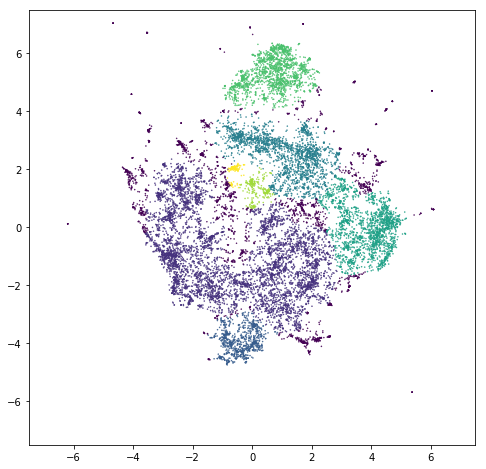

In [126]:
dbscan = DBSCAN(min_samples=200)
clustered = dbscan.fit_predict(reduced)
figure(figsize=(8,8))
plt.scatter(
    reduced[:,0],
    reduced[:,1],
    marker = '.',
    c = clustered,
    s = 1
)
#plt.rcParams["figure.figsize"] = (4,4)
plt.xlim([-7.5,7.5])
plt.ylim([-7.5,7.5])

(-7.5, 7.5)

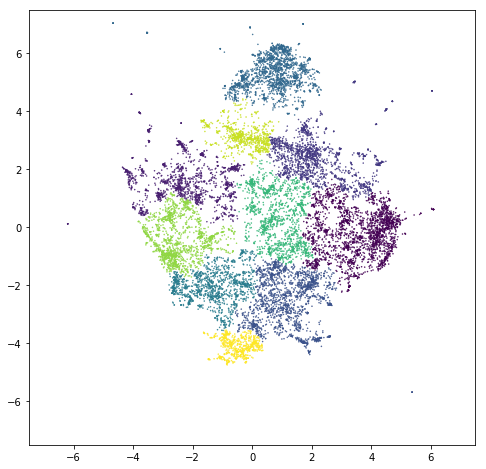

In [130]:
from sklearn.cluster import AgglomerativeClustering

aggclust = AgglomerativeClustering(linkage='ward', n_clusters=13)
clustered = aggclust.fit_predict(reduced)

figure(figsize=(8,8))
plt.scatter(
    reduced[:,0],
    reduced[:,1],
    marker = '.',
    c = clustered,
    s = 1
)
plt.xlim([-7.5,7.5])
plt.ylim([-7.5,7.5])

In [131]:
print(set(clustered))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [ ]:
tsne = TSNE(perplexity=40)

samples = vectorsl[np.random.choice(vectorsl.shape[0], 500, replace=False), :]
tsne_reduced = tsne.fit_transform(vectorsl)

In [ ]:
dbscan = DBSCAN()
clustered = dbscan.fit_predict(vectorsl)

plt.scatter(
    tsne_reduced[:,0],
    tsne_reduced[:,1],
    marker = '.',
    c = clustered,
    s = 1
)

In [ ]:
tsne = TSNE(perplexity=60)

tsne_reduced = tsne.fit_transform(vectorsl)

dbscan = DBSCAN()
clustered = dbscan.fit_predict(vectorsl)

plt.scatter(
    tsne_reduced[:,0],
    tsne_reduced[:,1],
    marker = '.',
    c = clustered,
    s = 1
)

In [ ]:
tsne = TSNE(perplexity=80)

tsne_reduced = tsne.fit_transform(vectorsl)

dbscan = DBSCAN()
clustered = dbscan.fit_predict(vectorsl)

plt.scatter(
    tsne_reduced[:,0],
    tsne_reduced[:,1],
    marker = '.',
    c = clustered,
    s = 1
)

In [ ]:
tsne = TSNE(perplexity=120)

tsne_reduced = tsne.fit_transform(vectorsl)

dbscan = DBSCAN()
clustered = dbscan.fit_predict(vectorsl)

plt.scatter(
    tsne_reduced[:,0],
    tsne_reduced[:,1],
    marker = '.',
    c = clustered,
    s = 1
)